***
# <font color=blue>UNSUPERVISED LEARNING</font>
# <font color=blue>Practice with PCA</font>
# <font color=blue>(lecturer version)</font>
<div style="text-align: right"><font color=magenta>Andrea De Simone</font></div>
***

In [1]:
import numpy as np  
import pandas as pd  
from scipy import ndimage
import matplotlib.pyplot as plt  
%matplotlib inline

***
## 1. PCA

### 1.1 Load Dataset 3

In [2]:
# Load data
X = np.loadtxt('dataset3.csv', delimiter=',')
print(X[:10])
print(X.shape)

[[ 3.38156267  3.38911268]
 [ 4.52787538  5.8541781 ]
 [ 2.65568187  4.41199472]
 [ 2.76523467  3.71541365]
 [ 2.84656011  4.17550645]
 [ 3.89067196  6.48838087]
 [ 3.47580524  3.63284876]
 [ 5.91129845  6.68076853]
 [ 3.92889397  5.09844661]
 [ 4.56183537  5.62329929]]
(50, 2)


In [3]:
def scatter_plot(X):
    
    fig, ax = plt.subplots()
    ax.set_xlabel('$x_1$',size=16)
    ax.set_ylabel('$x_2$',size=16)
    
    ax.scatter(X[:,0], X[:,1], c='blue', alpha=1, marker='x')
    plt.show() 

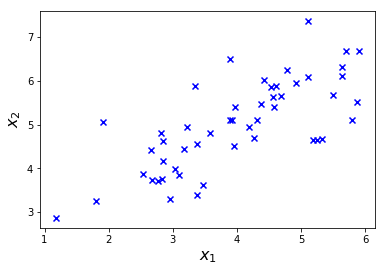

In [4]:
scatter_plot(X)

### 1.2 Normalize Features

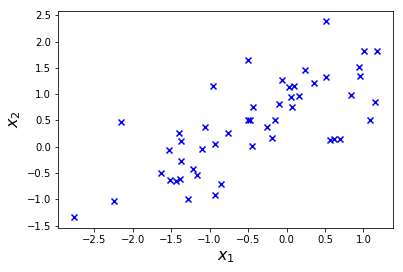

In [5]:
X_norm = (X - X.mean()) / X.std()
scatter_plot(X_norm)

In [7]:
# compute the covariance matrix
Sigma = X_norm.T.dot(X_norm) / X_norm.shape[0]
print(Sigma)

[[ 1.11151143  0.4213388 ]
 [ 0.4213388   0.88848857]]


In [8]:
eigenValues, eigenVectors = np.linalg.eigh(Sigma)

# Sort in descending order
idx = eigenValues.argsort()[::-1]  # list reverse
eigenValues = eigenValues[idx]
V = eigenVectors[:,idx]

print("Eigenvalues = ",eigenValues)
print("Eigenvectors = ",V)

Eigenvalues =  [ 1.43584536  0.56415464]
Eigenvectors =  [[-0.79241747  0.60997914]
 [-0.60997914 -0.79241747]]


In [18]:
# Using SVD
UU, SS, VV = np.linalg.svd(Sigma)
#VV.T.dot(Sigma).dot(VV)

In [19]:
# check diagonalization
V.T.dot(Sigma).dot(V)

array([[  1.43584536e+00,  -1.11022302e-16],
       [  0.00000000e+00,   5.64154636e-01]])

In [20]:
k=1
W = V[:,:k]
W

array([[-0.79241747],
       [-0.60997914]])

### 1.x Project and recover data

In [12]:
# projected data
Z = X_norm.dot(W)
Z[:10]

array([[ 1.29667774],
       [-0.71033434],
       [ 1.25612466],
       [ 1.53744654],
       [ 1.25029805],
       [-0.61207992],
       [ 1.11082635],
       [-2.04206316],
       [ 0.06819419],
       [-0.61554135]])

In [13]:
# recover data
X_approx = Z.dot(W.T)
X_approx[:10]

array([[-1.0275101 , -0.79094638],
       [ 0.56288134,  0.43328913],
       [-0.99537513, -0.76620984],
       [-1.2182995 , -0.93781032],
       [-0.99075802, -0.76265573],
       [ 0.48502282,  0.37335599],
       [-0.88023821, -0.6775809 ],
       [ 1.61816653,  1.24561593],
       [-0.05403827, -0.04159703],
       [ 0.48776572,  0.37546738]])

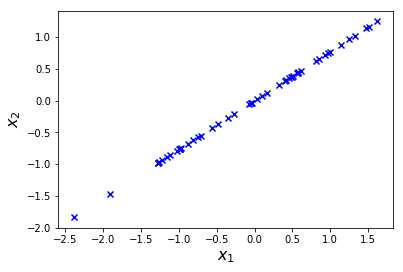

In [14]:
scatter_plot(X_approx)

### 1.x Explained Variance

In [34]:
np.sum(np.square((X_norm-X_approx)))/np.sum(np.square(X_norm))

0.28207731806859226

In [68]:
DD = V.T.dot(Sigma).dot(V)
RR = np.diagonal(DD)[0]/ np.sum(np.diagonal(DD))
1-RR
print("% of variance retained: {:.1f}%".format(RR*100,2))

% of variance retained: 71.8%


## 2. PCA on Faces

### 2.1 Load Dataset 'Faces'

In [69]:
# Load data
X = np.loadtxt('dataset_faces.csv', delimiter=',')
print(X[:2])
print(X.shape)

[[-73.86631387 -72.86631387 -68.86631387 ..., -79.86631387 -81.86631387
  -83.86631387]
 [ 22.13368613  21.13368613  20.13368613 ..., -83.86631387 -86.86631387
  -80.86631387]]
(10, 1024)


In [70]:
def plot_faces(X):
    
    N_faces = 10
    fig, ax = plt.subplots(1,N_faces,figsize=(16,4))

    for i in range(N_faces):

        face = np.reshape(X[i,:], (32, 32))  
        rotated_face = ndimage.rotate(face, 90)
        ax[i].imshow(rotated_face, origin="lower", cmap='gray')
        ax[i].set_axis_off()

    plt.show()

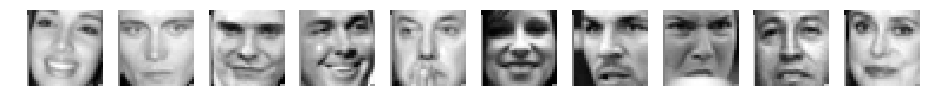

In [16]:
plot_faces(X)

In [76]:
# Normalize features
X_norm = (X - X.mean()) / X.std()

# compute the covariance matrix
Sigma = X_norm.T.dot(X_norm) / X_norm.shape[0]


eigenValues, eigenVectors = np.linalg.eigh(Sigma)

# Sort in descending order
idx = eigenValues.argsort()[::-1]  # list reverse
eigenValues = eigenValues[idx]
V = eigenVectors[:,idx]

### 2.2 Vary the number of principal components

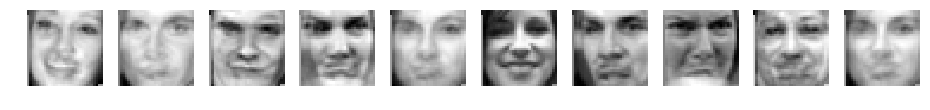

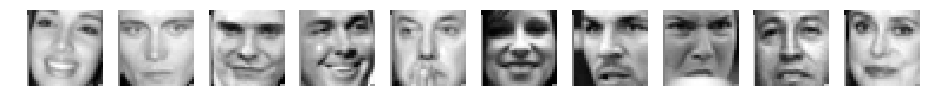

0.12795346807094149

In [111]:
k=5
W = V[:,:k]

# projected data
Z = X_norm.dot(W)
# recover data
X_approx = Z.dot(W.T)

plot_faces(X_approx)
plot_faces(X)
np.sum(np.square((X_norm-X_approx)))/np.sum(np.square(X_norm))

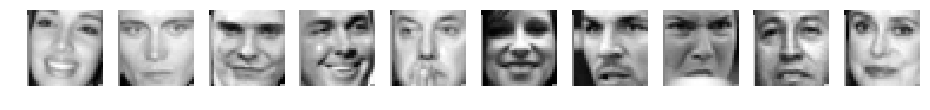

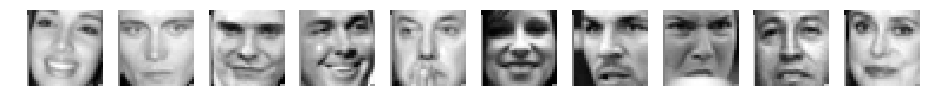

In [110]:
k=10
W = V[:,:k]

# projected data
Z = X_norm.dot(W)
# recover data
X_approx = Z.dot(W.T)

plot_faces(X_approx)
plot_faces(X)

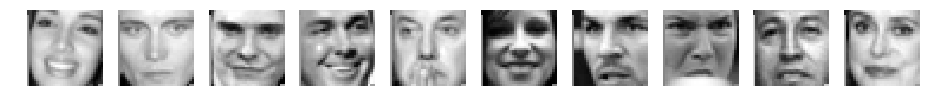

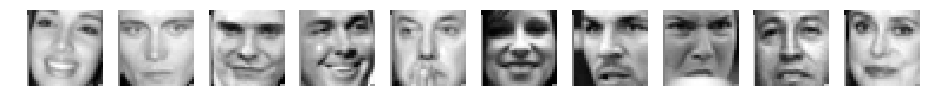

1.4213961934071587e-30

In [83]:
k=100
W = V[:,:k]

# projected data
Z = X_norm.dot(W)
# recover data
X_approx = Z.dot(W.T)

plot_faces(X_approx)
plot_faces(X)

### 2.3 Variance Retained

In [109]:
np.sum(np.square((X_norm-X_approx)))/np.sum(np.square(X_norm))

1.4479591030042349e-30

In [113]:
for k in [3,5,10,20]:
    
    # Reduced matrix
    W = V[:,:k]
    # projected data
    Z = X_norm.dot(W)
    # recover data
    X_approx = Z.dot(W.T)
    DD = V.T.dot(Sigma).dot(V)
    RR = np.sum(np.diagonal(DD[:k,:k]))/ np.sum(np.diagonal(DD))
    print("k={:d} | % of variance retained: {:.1f}%".format(k, RR*100,2))

k=3 | % of variance retained: 74.3%
k=5 | % of variance retained: 87.2%
k=10 | % of variance retained: 100.0%
k=20 | % of variance retained: 100.0%
